In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

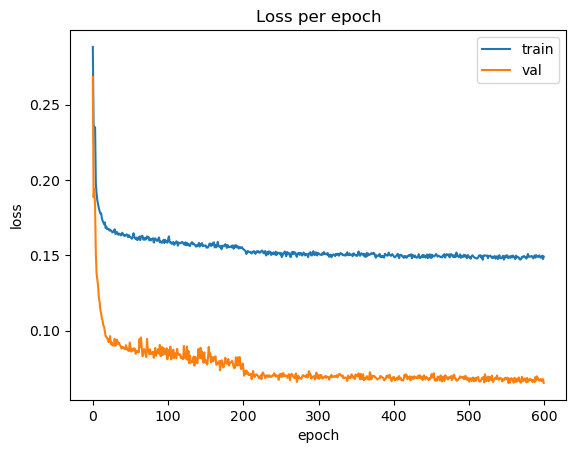

In [3]:
tr_loss = np.load('loss_train_per_ep.npy')
val_loss = np.load('loss_test_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss per epoch')
plt.show()

In [6]:
ori_norm = np.array(np.loadtxt("data/pcpnet/galera100k.normals"))
pred_norm = np.array(np.loadtxt("log_single_scale/my_experiments/my_experiment/results/galera100k.normals"))

In [18]:
def rms_angular_error(estimated_normals, ground_truth_normals):
    estimated_normals = F.normalize(estimated_normals, dim=1)
    ground_truth_normals = F.normalize(ground_truth_normals, dim=1)

    dot_product = torch.sum(estimated_normals * ground_truth_normals, dim=1)
    dot_product = torch.clamp(dot_product, -1.0, 1.0)
    dot_product = torch.abs(dot_product)
    angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
    squared_diff = angular_diff.pow(2)
    mean_squared_diff = torch.mean(squared_diff)
    rms_angular_error = torch.sqrt(mean_squared_diff)
    return rms_angular_error.item() 

rms = rms_angular_error(torch.tensor(pred_norm), torch.tensor(ori_norm))
print(rms)

7.48003091233426


In [17]:
ori_t = torch.tensor(ori_norm)
pred_t = torch.tensor(pred_norm)
dot_product = torch.abs(torch.dot(ori_t[0], pred_t[0]))
print(dot_product.item())
angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
print(angular_diff.item())

0.9964753987302184
4.811940461571517


In [27]:
t1 = torch.rand(4,128,55)
t2 = torch.rand(4,128,55)
t3 = t1+t2
t3.shape

torch.Size([4, 128, 55])

In [28]:
out = torch.nn.AdaptiveAvgPool1d(1)(t3)
print(out.shape)


torch.Size([4, 128, 1])
